# Plot a Striplog from a StratLogger CSV

Uses format exported by "StratLogger," an Android app for quick-logging stratigraphic sections that was developed at Colorado School of Mines
https://github.com/jcliang001/Stratlogger

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import striplog
from striplog import Lexicon, Decor, Component, Legend, Interval, Striplog
print('FYI, the striplog version you have is',striplog.__version__)

FYI, the striplog version you have is 0.8.3


## Make legend

Most of the stuff in the dicts you made were about **display** — so they are going to make `Decor` objects. A collection of `Decor`s makes a `Legend`. A `Legend` determines how a striplog is displayed.

First I'll make the components, since those are easy. I'll move `'train'` into there too, since it is to do with the rocks, not the display. If it seems weird having `'train'` in the `Component` (which is really supposed to be about direct descriptions of the rock, but the idea is that it's always the same for all specimens of that rock so it does fit here) then you could put it in `data` instead. 

In [2]:
# define your abbreviations here, this is what the CSV will read in

facies = {
    'sand': Component({'lithology': 'sandstone', 'train':'y'}),
    'mud': Component({'lithology': 'mudstone', 'train':'y'}),
    'other': Component({'lithology': 'calcilutite', 'train': 'n'}),
}

In [3]:
facies.keys()

dict_keys(['sand', 'mud', 'other'])

In [4]:
# pick how your facies will look in the log, see striplog for specfics

# NEED TO FIGURE OUT HOW TO PLOT EDGECOLORS!!!!!!!!!!
########
########
#######

sandstone = Decor({
    'component': facies['sand'],
    'colour': 'yellow',
    'hatch': 'none',
    'width': '3',
    'edgecolor': 'k',
})

mudstone = Decor({
    'component': facies['mud'],
    'colour': 'darkgray',
    'hatch': 'none',
    'width': '2',
    'edgecolor': 'k',
})

calcilutite = Decor({
    'component': facies['other'],
    'colour': 'blue',
    'hatch': 'none',
    'width': '1',
    'edgecolor': 'k',
})
legend = Legend([sandstone, mudstone, calcilutite])
legend

Legend(Decor({'component': Component({'lithology': 'sandstone', 'train': 'y'}), '_colour': '#ffff00', 'hatch': None, 'width': 3.0, 'edgecolor': 'k'})
Decor({'component': Component({'lithology': 'mudstone', 'train': 'y'}), '_colour': '#a9a9a9', 'hatch': None, 'width': 2.0, 'edgecolor': 'k'})
Decor({'component': Component({'lithology': 'calcilutite', 'train': 'n'}), '_colour': '#0000ff', 'hatch': None, 'width': 1.0, 'edgecolor': 'k'}))

## Read CSV into striplog

In [5]:
pathname = '/OneDrive/OneDrive - Colorado School of Mines/THESIS/StratLoggerPlotter/'
filename = 'SL1.csv'
strip = Striplog.from_csv(pathname + filename) # reading in the CSV file

strip[-1] # quick test of the lowermost bed in the log

Interval({'top': Position({'middle': 0.25, 'units': 'm'}), 'base': Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}), 'description': '', 'data': {'sectionname': 'SL1.csv', 'bednum': 1.0, 'lith': 2.0, 'lithname': 'other', 'thickness': 25.0, 'bedid': 'a1', 'note': '', 'picturename': 'chance1.csv_1'}, 'components': []})

## Deal with lithology

The lithology has been turned into a component, but it's using the abbreviation... I can't figure out an elegant way to deal with this so, for now, we'll just loop over the striplog and fix it. We read the `data` item's lithology (`'s'` in the top layer), then look up the correct lithology name in our abbreviation dictionary, then add the new component in the proper place. Finally, we delete the `data` we had.

In [6]:
strip[-1].data['bedid']

'a1'

In [7]:
for s in strip:
    lith = s.data['lithname']
    s.components = [facies[lith]]
    s.bedid = s.data['bedid']
    s.data = {}
# DONT RUN THIS AGAIN

In [8]:
strip[-1].bedid
len(strip)
strip[-1].top.middle

0.25

In [9]:
bedid=[]
y=[]
for s in strip:
    y.append(s.top.middle)
    bedid.append(s.bedid)
x=np.ones(68)
x2=x.reshape(-1,1)
x2
bedid

['',
 '',
 '',
 '',
 'c13',
 'c12',
 '',
 'c11',
 '',
 'c10',
 '',
 'c9.1',
 '',
 'c9',
 '',
 'c8',
 '',
 'c7.1',
 '',
 'c7',
 '',
 'c6',
 '',
 '',
 '',
 'c5',
 '',
 'c4',
 '',
 'c3',
 '',
 'c1 top',
 '',
 'c1 base',
 '',
 '',
 '',
 'b16',
 '',
 'b15.3',
 '',
 '',
 '',
 'b15.1',
 '',
 'b15',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'b14',
 '',
 'b13',
 '',
 'b12',
 '',
 'b11',
 '',
 '',
 '',
 'b10',
 '',
 'b9',
 '',
 '',
 '',
 'ash',
 '',
 '',
 'b13',
 '',
 'b12',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'b5',
 '',
 'b4',
 '',
 'b3',
 '',
 'b2',
 '',
 'b1',
 '',
 'a8',
 '',
 '',
 '',
 '',
 '',
 '',
 'a7',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'a6',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'a3',
 '',
 '',
 '',
 '',
 '',
 'a2',
 '',
 'a1']

That's better!

IndexError: index 68 is out of bounds for axis 0 with size 68

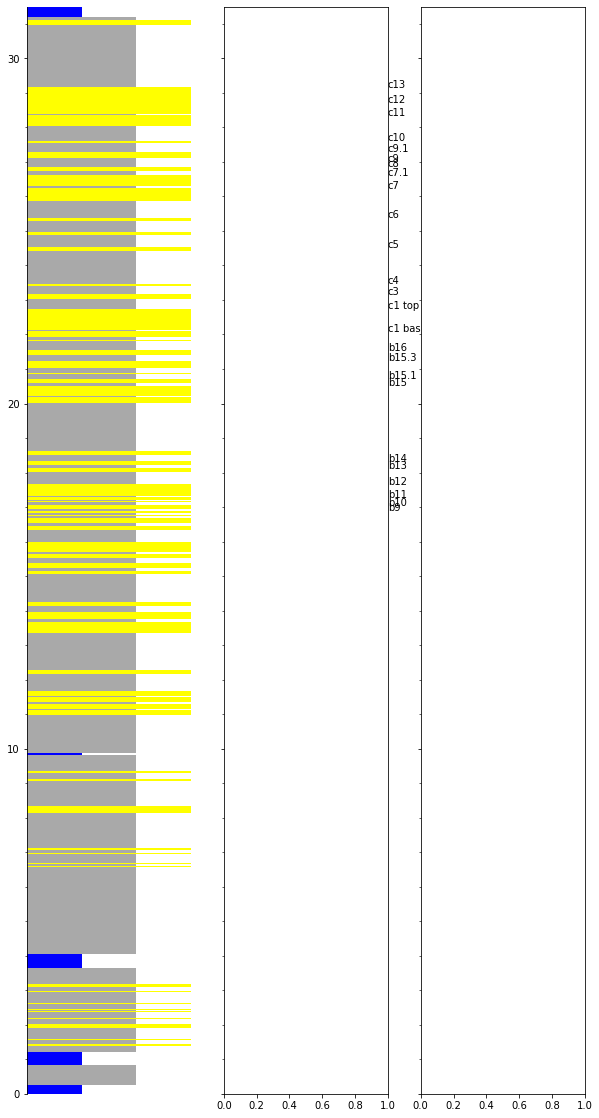

In [10]:
#fig = strip.plot(label='lithology',legend=legend,return_fig=True)


# Default behaviour: meet in middle.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,20), sharey=True)
strip.plot(legend=legend, return_fig=True, ax=ax1)
for i in range(len(bedid)):
    ax2.text(x[i],y[i],bedid[i])

strip.plot(legend=legend, return_fig=True, ax=ax3)

In [11]:
# Save figure
fig.savefig(filename + '_export.pdf')


## Remove non-training layers

In [11]:
strip

Striplog(68 Intervals, start=0.0, stop=16.67)

In [12]:
strip_train = Striplog([s for s in strip if s.primary['train'] == 'y'])

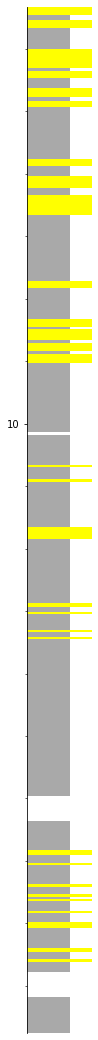

In [13]:
strip_train

strip_train.plot(legend)

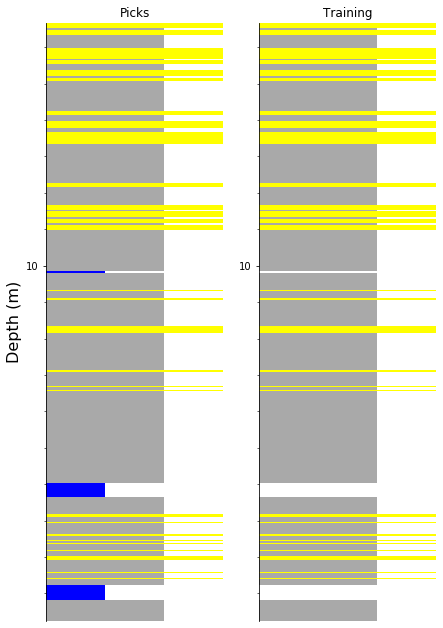

In [14]:
# plottin' & exportin'

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(7, 11) # Set the figure size

ax0 = strip.plot(legend, ax=ax0)
ax1 = strip_train.plot(legend, ax=ax1)

ax0.set_title('Picks')
ax1.set_title('Training')

ax0.set_ylabel('Depth (m)', size=16)

plt.show()
fig.savefig('Picks_v_training.pdf', dpi=300)

In [15]:
print(strip.to_csv())

Top,Base,Component
16.67,16.54,"Sandstone, y"
16.54,16.46,"Mudstone, y"
16.46,16.33,"Sandstone, y"
16.33,15.99,"Mudstone, y"
15.99,15.69,"Sandstone, y"
15.69,15.64,"Mudstone, y"
15.64,15.53,"Sandstone, y"
15.53,15.37,"Mudstone, y"
15.37,15.22,"Sandstone, y"
15.22,15.16,"Mudstone, y"
15.16,15.07,"Sandstone, y"
15.07,14.24,"Mudstone, y"
14.24,14.13,"Sandstone, y"
14.13,13.97,"Mudstone, y"
13.97,13.77,"Sandstone, y"
13.77,13.66,"Mudstone, y"
13.66,13.34,"Sandstone, y"
13.34,12.28,"Mudstone, y"
12.28,12.17,"Sandstone, y"
12.17,11.67,"Mudstone, y"
11.67,11.54,"Sandstone, y"
11.54,11.51,"Mudstone, y"
11.51,11.34,"Sandstone, y"
11.34,11.29,"Mudstone, y"
11.29,11.16,"Sandstone, y"
11.16,11.11,"Mudstone, y"
11.11,10.97,"Sandstone, y"
10.97,9.86,"Mudstone, y"
9.86,9.81,"Calcilutite, n"
9.81,9.34,"Mudstone, y"
9.34,9.3,"Sandstone, y"
9.3,9.12,"Mudstone, y"
9.12,9.06,"Sandstone, y"
9.06,8.48,"Mudstone, y"
8.48,8.34,"Mudstone, y"
8.34,8.15,"Sandstone, y"
8.15,7.13,"Mudstone, y"
7.13,7.07,"Sandstone